# Introduction

We will be doing some basic analysis on the RNA sequences for different types of the covid virus. Ultimately, I would like to show the similarities between some of the chosen sequences as well as where some sequences may have mutated from the reference sequence.

Quick note: the sequences have T as one of the bases but in reality this should be a U. The database I used seemed to keep T (Thymine is a base in DNA) when it probably should have used U (Uracil is the corresponding base in RNA which we worked with).

You can find the data [here]("https://ftp.ncbi.nlm.nih.gov/genomes/genbank/viral/Severe_acute_respiratory_syndrome-related_coronavirus/latest_assembly_versions/") and its [documentation]("https://www.ncbi.nlm.nih.gov/datasets/docs/v1/reference-docs/data-packages/sars-cov-2-genome/").

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
metadata = pd.read_csv("ncbi_datasets.csv")

C:\Users\avisi\AppData\Local\Temp\ipykernel_18076\1451368842.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("ncbi_datasets.csv")


## Simple Data Exploration

In [2]:
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [3]:
metadata.dtypes

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847791 entries, 0 to 847790
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nucleotide Accession  847791 non-null  object 
 1   Species Taxonomy Id   847791 non-null  int64  
 2   Species Name          847791 non-null  object 
 3   Virus Genus           847791 non-null  object 
 4   Virus Family          847791 non-null  object 
 5   Isolate Name          609653 non-null  object 
 6   Nucleotide Length     847791 non-null  int64  
 7   Sequence Type         847791 non-null  object 
 8   Nuc Completeness      847791 non-null  object 
 9   Geo Location          847720 non-null  object 
 10  US State              0 non-null       float64
 11  Host Name             0 non-null       float64
 12  Host Taxonomy ID      847791 non-null  int64  
 13  Collection Date       847595 non-null  object 
 14  BioProject            611783 non-null  object 
 15  

In [5]:
# Convert "Collection Date" column to a datetime object 
metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"])

In [6]:
# Use regex to replace the semicolon and anything after it with nothing
metadata["Continent"] = metadata["Geo Location"].str.replace(";.+", "", regex=True)

In [7]:
# Group by continent then sort by collection date and take first value. This gives us information on when the first sequence was found
metadata.groupby("Continent").apply(lambda x: x.sort_values("Collection Date").iloc[0])

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
Continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,OU393175.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,29890,GenBank,complete,Europe; United Kingdom:England,NaN,NaN,9606,2020-01-01,PRJEB37886,SAMEA9354774,Europe
North America,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
Oceania,MW320919.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC16874/2020,29790,GenBank,complete,Oceania; Australia: Victoria,NaN,NaN,9606,2020-01-01,NaN,SAMN16975285,Oceania
South America,MZ477858.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/PR-HF441/2020,29779,GenBank,complete,South America; Brazil: Parana,NaN,NaN,9606,2020-01-01,NaN,NaN,South America


Quick note: some of the collection dates are the first day of the month

This happens because when we converted the dates to a datetime object, some of the dates only had months so the conversions defaulted to the first day

In [8]:
# How many sequences were collected by continent
metadata["Continent"].value_counts()

North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: Continent, dtype: int64

North America/Europe may be overrepresented because the data was collected by NIH which is an American organization

In [9]:
# Descriptive statistics on the length of the different nucleotides
metadata["Nucleotide Length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: Nucleotide Length, dtype: float64

Most of the lengths appear to be pretty similar, but there is an outlier (the min) that I want to take a look at

In [10]:
metadata[metadata["Nucleotide Length"] == 2859]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


For this row, looking at the completeness column ("Nuc Completeness") indicates that the genome is complete. I am honestly not sure why the nucleotide length is so short... maybe a typo? Maybe the length should be 28590 and they forgot a 0.

In [11]:
# Creating a series from the Collection Date column
# Takes the collection date and returns the year and month values
sample_month = pd.Series(metadata["Collection Date"].values.astype("<M8[M]"))

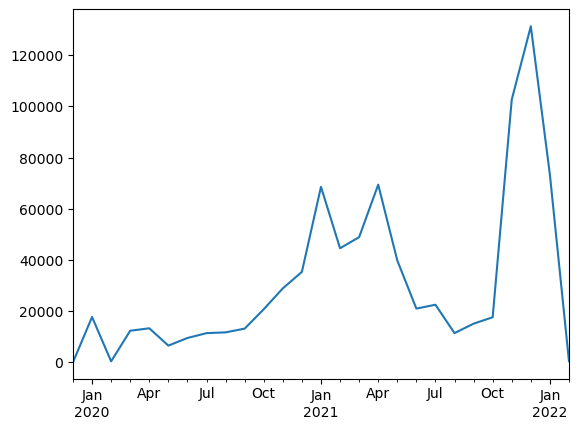

In [12]:
sample_month.value_counts().sort_index().plot()
plt.show()

This graph shows us the number of samples sequenced by month. We can see an uptick at the start of 2021 and than another large spike somewhat recently. I would assume the most recent spike is due to the omicron variant.

## Sequence Analysis

We will move on from looking at the metadata to actually analysing the sequences themselves.

In [13]:
metadata[metadata["Sequence Type"] == "RefSeq"]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


This sequence is the Reference Sequence, or the first covid genome to be fully sequenced.

In [14]:
# Using the nucleotide accession of the RefSeq as a way to access this sequence later
nucleotide_ids = ["NC_045512.2"]

We will also look at the metadata for other common variants, namely delta and omicron. We can do this by looking at the "Isolate Name" column.

The entries in this column will "contain" the name of the variant somewhere in the string, which we will search for.

In [15]:
metadata[metadata["Isolate Name"].str.contains("Delta").fillna(False)]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [16]:
metadata[metadata["Isolate Name"].str.contains("Omicron").fillna(False)]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [17]:
sequences = nucleotide_ids + ["OL467832.1","OM061695.1", "OM095411.1"]

We are just making a list of different nucleotide accessions with the RefSeq, the first omicron and delta sequences, as well as the first sequence from North America for fun.

In [18]:
sequence_names = ["reference", "base", "delta", "omicron"]

In [19]:
selected_sequences = metadata[metadata["Nucleotide Accession"].isin(sequences)]

In [20]:
selected_sequences

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


We now have the nucleotide accession numbers, we need to actually get the sequences for these numbers.

We can do this with a library called biopython.

In [21]:
!pip install biopython

In [22]:
from Bio import Entrez
Entrez.email = "avirhea@gmail.com"

In [23]:
def download_sequence(id_code): # Takes in an id number and gives us a sequence. 
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1") #Search NIH database for given sequence
    record = Entrez.read(handle) # Read results from the search handle
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text") # Search again for our sequence
    return handle.read() # Returns the sequence

In [24]:
sequence_data = {}
for sequence in sequences: # Loop through all sequences and for each one, download the sequence from the NIH database and store it in our dictionary
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}

In [25]:
sequence_data["OM095411.1"]

{'fasta': '>OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome\nCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGC\nATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTC\nTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCG\nGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGT\nTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAG\nAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACT\nTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAG\nCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATG\nTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCA\nTAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTT\nCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGG\nCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCT\nTCT

The output is very long but I will keep it because of how cool it is! I tried to keep it a bit smaller by only using 1 id (this shows the omicron variant) but unfortunately the output is still quite large.

We now have the id number and the actual RNA sequence for the id number :)

In [26]:
from Bio import SeqIO
import io

for key,value in sequence_data.items(): 
    f = io.StringIO(value["fasta"]) # Create a file object because Biopython only works with files
    sequence_data[key]["parsed"] = list(SeqIO.parse(f, "fasta"))[0] # Parse the file object to get the sequence

In [27]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

Now we can do some cool analysis on the genome sequences

We will start by looking at how different the different sequences are from each other

In [28]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [29]:
aligner.algorithm

'Needleman-Wunsch'

This algorithm is one of the first application of dynamic programming in bioinformatics


If you are curious, you can read more about the algorithm [here]("https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm").

In [30]:
# Take the given sequences and store the score of the algorithm in "score"
# The score basically tells us how alligned the sequences are relative to the number of nucleotides in the sequence
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
score

29818.0

In [31]:
score/len(sequence_data["NC_045512.2"]["parsed"].seq)

0.9971574758385446

We can see the score is quite high, meaning the two sequences are rather similar

Now let's see how these scores compare across all of the sequences

In [32]:
import numpy as np
comparisons = np.zeros((4,4)) # Initialize a 4x4 matrix, the cells will become the scores for each sequence pair

for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [33]:
comparisons

array([[29903.,     0.,     0.,     0.],
       [29820., 29831.,     0.,     0.],
       [29818., 29775., 29858.,     0.],
       [29725., 29722., 29688., 29788.]])

In [34]:
comparison_df = pd.DataFrame(comparisons, columns=sequence_names, index=sequence_names)
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [35]:
comparison_df.iloc[:,0] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

These numbers give us the overlap between each of the sequences relative to the reference sequence.

Let's move on and see where the sequences mutated (or where the sequences do not match up).

In [36]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
delta_alignments = aligner.align(seq1,  seq2)

delta_alignments

In [37]:
delta_alignment = delta_alignments[0]

In [38]:
delta_alignment.shape

(2, 29943)

Shape means we alligned 2 sequences and there are 29943 nucleotides that we alligned.

In [39]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 

These tuples tell us where the 2 sequences allign.

In [40]:
# Looping through all of the alignments and find where the sequences do not align
# We do this by finding where the alignments end and where the next alignments start
# Print out the sequence from right after the alignement ends, also known as where the misalignment starts, up until the next alignment starts, or where the misalignment ends.

seq1_end = None
seq2_end = None
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


From this output we can see what mismatches occur between the two sequences, but we can't see where they occur.

In [41]:
from IPython.display import HTML

In [42]:
# Displays the data with color using some HTML
def color_print(s, color='black'):
    return "<span style='color:{}'>{}</span>".format(color, s)

In [43]:
# Reusing the old code from a few cells ago

seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        if len(seq2_mismatch)==0: # Deletion occurs
            display_seq.append(color_print(seq1[seq1_end:alignments[0][0]], "red"))
        elif len(seq1_mismatch)==0: # Insertion occurs
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "orange"))
        else: # Substitution occurs
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "blue"))
    
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [44]:
display_seq = [str(i) for i in display_seq]

In [45]:
display(HTML('<br>'.join(display_seq)))

Now we can see the full sequences and where the mismatches occur. As a reminder, the sequences being compared are the reference sequence and the delta variant.

The black is where both sequences align, red is where something from the first (reference) sequence was deleted, orange is where something was inserted into the delta variant, and blue is a substitution from the reference sequence to the delta variant.

## Final Thoughts

We looked at a database from the NIH that provides information on various RNA sequences.

We looked at the actual RNA sequences for different variants of covid, as well as looked at the similarity and sites of difference between the reference sequence and the delta variant.

For the future, there are some other cool things to look at like:
* Converting the nucleotides to codons and find what proteins are being encoded by these nucleotides and how the proteins may have changed between variants
* Much of the metadata contains timestamps, so we could look at specifically what mutations occurred over time
* We could look at what the most common types of mutations are, as well as what the most common mutation sites are